<a href="https://colab.research.google.com/github/nxf-emma/APS360-Artificial-Intelligence-Fundamentals/blob/main/data_augmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import torch
import pandas as pd
import os
import torchvision
from torchvision import transforms
import datetime
import matplotlib.pyplot as plt


In [ ]:
'''
#can also download from kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/aps360_dataset'
!kaggle datasets download -d msambare/fer2013
'''

"\n#can also download from kaggle\nos.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/aps360_dataset'\n!kaggle datasets download -d msambare/fer2013\n"

In [ ]:
#could take 10 minites to import to google drive
#faster if unzip locally to /content
!unzip -q '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013.zip' -d '/content/drive/MyDrive/APS360 Team/aps360_dataset' #&& rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013/train/angry/Training_81541574.jpg  
  inflating: /content/drive/MyDrive/APS360 Team/aps360_dataset/__MACOSX/FER-2013/train/angry/._Training_81541574.jpg  
  inflating: /content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013/train/angry/Training_50120123.jpg  
  inflating: /content/drive/MyDrive/APS360 Team/aps360_dataset/__MACOSX/FER-2013/train/angry/._Training_50120123.jpg  
  inflating: /content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013/train/angry/Training_60016886.jpg  
  inflating: /content/drive/MyDrive/APS360 Team/aps360_dataset/__MACOSX/FER-2013/train/angry/._Training_60016886.jpg  
  inflating: /content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013/train/angry/Training_68690730.jpg  
  inflating: /content/drive/MyDrive/APS360 Team/aps360_dataset/__MACOSX/FER-2013/train/angry/._Training_68690730.jpg  
  inflating: /content/drive/MyDrive/APS36

In [4]:
# the original image size
img_size = 48     

In [7]:
# Composes several transforms together.
data_transform = transforms.Compose(
    [
        #convert image to grayscale
        transforms.Grayscale(num_output_channels=3),
        #randomly adding brightness 
        transforms.ColorJitter(brightness=(1,1.2)),
        #apply ramdom rotation from -30 to 30 degrees
        transforms.RandomRotation(30),
        #apply random horizontal flip with probability of 50% 
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        #normalize the data with 0.5 mean and variance.
        transforms.Normalize((0.5), (0.5), inplace=True)
       
    ])

parent_path = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013/'
training_set = torchvision.datasets.ImageFolder(parent_path+'train',transform = data_transform)
valid_set = torchvision.datasets.ImageFolder(parent_path+'valid',transform = data_transform)
test_set = torchvision.datasets.ImageFolder(parent_path+'test',transform = data_transform)

batch_size = 400
# two sub processes used for data loading
num_workers = 1

#get data loader
train_loader = torch.utils.data.DataLoader(training_set,batch_size = batch_size ,num_workers = num_workers,shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_set,batch_size = batch_size ,num_workers = num_workers,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size = batch_size,num_workers = num_workers,shuffle = True)


FileNotFoundError: ignored

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


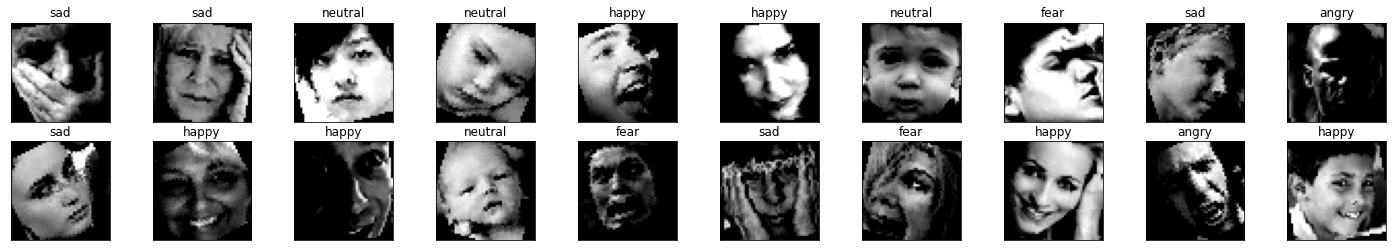

In [ ]:
#we plot of images for verification
data_iter = iter(train_loader)
images, labels = data_iter.next()
images = images.numpy()
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    img = np.transpose(images[idx], (1, 2, 0))
    #to disable the clip warning when ploting
    img = img/np.amax(img)
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    ax.set_title(classes[labels[idx]])
